In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_array=cv2.imread('/Users/soham2312/Downloads/images/images/train/angry/307.jpg')

In [4]:
# img_array.shape
type(img_array)

numpy.ndarray

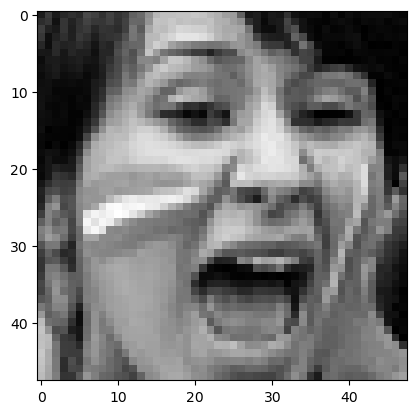

In [4]:
plt.imshow(img_array)

In [5]:
Data_Directory='/Users/soham2312/Downloads/images/images/train'

In [2]:
Classes=["angry","disgust","fear","happy","neutral","sad","surprise"]

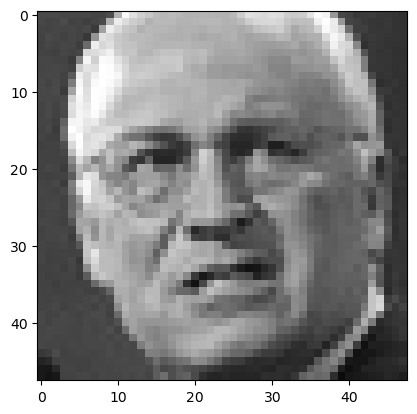

In [7]:
for category in Classes:
    path=os.path.join(Data_Directory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

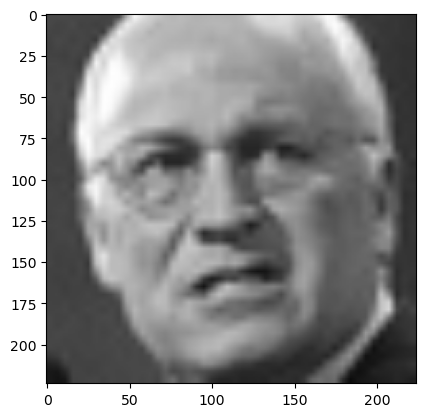

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_data=[]
def create_training_data():
    for category in Classes:
        path=os.path.join(Data_Directory,category)
        classnum=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,classnum])
            except exception as e:
                pass
create_training_data()

In [11]:
print(len(training_data))

28821


In [12]:
import random
random.shuffle(training_data)

In [13]:
X=[]#data/feature
Y=[]#label
for features,label in training_data:
    X.append(features)
    Y.append(label)

In [14]:
X=np.array(X).reshape(-1,img_size,img_size,3)

In [15]:
X.shape

(28821, 224, 224, 3)

In [16]:
Y[1000]

3

In [17]:
Y=np.array(Y)

In [18]:
Y.shape

(28821,)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model=tf.keras.applications.MobileNetV2()

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [22]:
base_input=model.layers[0].input

In [23]:
base_output=model.layers[-2].output

In [24]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [25]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [26]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [27]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [28]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
Y[7000]

3

In [31]:
new_model.fit(X,Y,epochs=25)

Epoch 1/25


2023-07-21 13:30:37.342358: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


901/901 [==============================] - 2674s 3s/step - loss: 1.2548 - accuracy: 0.5236
Epoch 2/25
901/901 [==============================] - 1520s 2s/step - loss: 1.0755 - accuracy: 0.5957
Epoch 3/25
901/901 [==============================] - 1473s 2s/step - loss: 0.9985 - accuracy: 0.6280
Epoch 4/25
901/901 [==============================] - 1543s 2s/step - loss: 0.9471 - accuracy: 0.6454
Epoch 5/25
901/901 [==============================] - 1703s 2s/step - loss: 0.8929 - accuracy: 0.6678
Epoch 6/25
901/901 [==============================] - 1899s 2s/step - loss: 0.8442 - accuracy: 0.6850
Epoch 7/25
901/901 [==============================] - 1600s 2s/step - loss: 0.7951 - accuracy: 0.7044
Epoch 8/25
901/901 [==============================] - 1682s 2s/step - loss: 0.7405 - accuracy: 0.7263
Epoch 9/25
901/901 [==============================] - 1519s 2s/step - loss: 0.6960 - accuracy: 0.7458
Epoch 10/25
901/901 [==============================] - 1733s 2s/step - loss: 0.6427 - accurac

In [32]:
new_model.save('Final_model_95p07.h5')

In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Classes=["angry","disgust","fear","happy","neutral","sad","surprise"]

In [2]:
new_model=tf.keras.models.load_model('Final_model_95p07.h5')

In [16]:
frame=cv2.imread("sadboy.jpg")

In [17]:
frame.shape

(216, 234, 3)

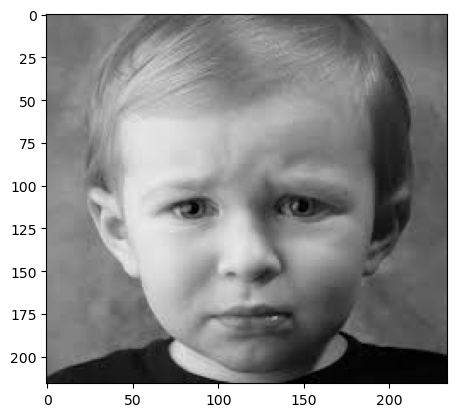

In [18]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [19]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [20]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [21]:
gray.shape

(216, 234)

In [22]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not Deteced")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

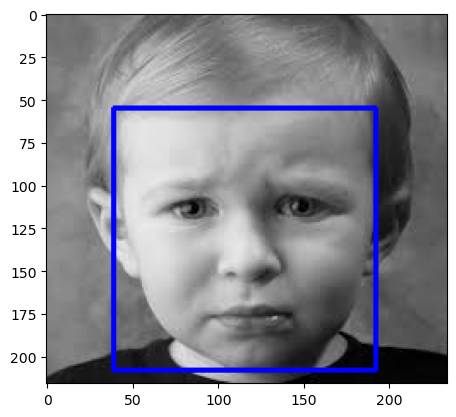

In [23]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [24]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
# final_image=final_image/255.0

In [25]:
predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 32ms/step


In [26]:
predictions[0]

array([3.26259375e-01, 3.86501197e-04, 1.27424495e-02, 2.34576564e-05,
       3.13383201e-03, 6.57425940e-01, 2.84621565e-05], dtype=float32)

In [27]:
Classes[np.argmax(predictions)]

'sad'

In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
new_model=tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
import cv2 
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="Some text in a box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open WebCam")

while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
#         print(facess)
        if len(facess)==0:
            print("Face not Deteced")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
#             print(face_roi)
#     print(face_roi)
            final_image=cv2.resize(face_roi,(224,224))
            final_image=np.expand_dims(final_image,axis=0)
            font=cv2.FONT_HERSHEY_SIMPLEX

            predictions=new_model.predict(final_image)
            print(predictions)
            font_scale=1.5
#             font=cv2.FONT_HERSHEY_PlAIN

            if(np.argmax(predictions)==0):
                status="Angry"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==1):
                status="Disgust"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==2):
                status="Fear"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==3):
                status="Happy"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==4):
                status="Neutral"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==5):
                status="Sad"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            elif(np.argmax(predictions)==6):
                status="Surprise"

                x1,y1,w1,h1=0,0,175,75

                cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
#                 cv2.putText(frame,status(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
            cv2.imshow('Face Emotion Recognition',frame)
            if(cv2.waitKey(2) & 0xFF==ord('q')):
                break
cap.release
cv2.destroyAllWindows()

[ WARN:0@0.949] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!
[ WARN:0@1.116] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
2023-08-01 22:04:01.095503: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 316ms/step
[[5.3525585e-01 7.4171585e-05 1.3163915e-02 2.7036273e-01 1.6231112e-01
  6.7396373e-03 1.2092508e-02]]
1/1 [==============================] - 0s 23ms/step
[[2.8072160e-01 2.4483606e-04 1.6931107e-02 4.0915513e-01 2.5975913e-01
  1.7707210e-02 1.5481024e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.9980402e-01 2.5079350e-04 1.6843917e-02 4.1560447e-01 3.3169505e-01
  2.1373693e-02 1.4428065e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.0711627e-01 5.7125599e-06 1.6624575e-02 8.7115869e-02 7.5263447e-01
  2.9586658e-02 6.9164154e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.1635050e-01 3.5739396e-04 4.8744276e-02 1.9860576e-01 5.5422401e-01
  4.9381781e-02 3.2336295e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.0483344e-02 4.5908906e-04 9.0689301e-02 6.5862082e-02 4.8850164e-01
  3.2618752e-01 1.7817011e-02]]
1/1 [==============================] - 0s 20ms/step
[[6.1230499

1/1 [==============================] - 0s 20ms/step
[[2.7175320e-02 7.5749354e-05 2.1439549e-02 1.8175010e-01 6.1343527e-01
  1.4941555e-01 6.7083817e-03]]
1/1 [==============================] - 0s 20ms/step
[[0.07142825 0.00036057 0.0253103  0.3291778  0.26605737 0.2992238
  0.00844185]]
1/1 [==============================] - 0s 21ms/step
[[0.01663621 0.00094356 0.03370423 0.24827991 0.21339948 0.478058
  0.00897858]]
1/1 [==============================] - 0s 20ms/step
[[1.02543175e-01 2.39019486e-04 2.16435585e-02 2.60215223e-01
  5.09264112e-01 9.29658189e-02 1.31290378e-02]]
1/1 [==============================] - 0s 21ms/step
[[3.9531128e-03 1.8238834e-04 4.7798030e-02 1.0050923e-02 3.1709680e-01
  6.1264914e-01 8.2696388e-03]]
1/1 [==============================] - 0s 21ms/step
[[5.4310770e-03 1.9503894e-04 5.3063415e-02 9.3128197e-02 5.1399153e-01
  3.2116190e-01 1.3028849e-02]]
1/1 [==============================] - 0s 21ms/step
[[6.1516240e-02 2.3484063e-05 1.3196421e-01 1.0520

1/1 [==============================] - 0s 25ms/step
[[1.08548835e-01 3.57921599e-05 3.96420853e-03 4.83216584e-01
  3.73151571e-01 2.84427740e-02 2.64028646e-03]]
1/1 [==============================] - 0s 24ms/step
[[3.9620924e-01 3.0719271e-05 1.3523832e-02 2.9368231e-01 2.7449402e-01
  1.3982409e-02 8.0774371e-03]]
1/1 [==============================] - 0s 24ms/step
[[2.6614326e-01 2.9627337e-05 6.9037220e-03 4.5028636e-01 2.5649390e-01
  1.2279379e-02 7.8637786e-03]]
1/1 [==============================] - 0s 21ms/step
[[4.59808344e-03 1.24036351e-05 7.69183785e-03 1.16551906e-01
  2.53032207e-01 6.17143333e-01 9.70306515e-04]]
1/1 [==============================] - 0s 20ms/step
[[1.7903998e-02 7.3933202e-06 1.0396808e-02 6.9709055e-02 7.7625972e-01
  1.2337163e-01 2.3513476e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.3624975e-03 6.5670838e-06 4.2882148e-02 1.9739703e-03 2.2752436e-01
  7.2508597e-01 1.1644837e-03]]
1/1 [==============================] - 0s 21ms/ste

1/1 [==============================] - 0s 21ms/step
[[2.34035477e-01 2.30990263e-04 1.54547002e-02 4.42671835e-01
  2.72027284e-01 1.46381045e-02 2.09416281e-02]]
1/1 [==============================] - 0s 22ms/step
[[6.5710046e-04 5.6570771e-06 1.4868762e-02 5.2894638e-03 6.8039745e-01
  2.9711193e-01 1.6695766e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.01800925e-04 1.08967974e-07 4.72347299e-03 1.11739748e-04
  8.02978218e-01 1.91822857e-01 1.61831034e-04]]
1/1 [==============================] - 0s 20ms/step
[[2.9901855e-04 6.9494553e-07 6.5722787e-03 1.5594572e-03 6.5274704e-01
  3.3843964e-01 3.8194755e-04]]
Face not Deteced
1/1 [==============================] - 0s 20ms/step
[[1.0458193e-04 4.9390572e-08 2.2059632e-03 1.6955083e-04 6.5303934e-01
  3.4444946e-01 3.1035710e-05]]
1/1 [==============================] - 0s 20ms/step
[[1.4153300e-04 4.7339708e-07 4.2478899e-03 1.7415239e-02 3.9467132e-01
  5.8331341e-01 2.1005279e-04]]
1/1 [============================

1/1 [==============================] - 0s 20ms/step
[[2.4555940e-02 2.6722350e-05 6.0277004e-03 4.5569625e-01 2.1100475e-01
  3.0056024e-01 2.1283664e-03]]
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[6.9850835e-04 1.4704401e-06 3.1353089e-03 1.9576666e-03 1.0094066e-02
  9.8404771e-01 6.5230168e-05]]
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[2.6758242e-04 2.6004481e-09 7.4042866e-05 1.6792446e-05 4.1446984e-01
  5.8517128e-01 4.2226188e-07]]
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 20ms/step
[[4.9893773e-01 4.8722457e-05 9.2187002e-03 2.8917170e-01 1.8620951e-01
  6.6253822e-03 9.7882859e-03]]
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 20ms/step
[[0.32650474 0.00038834 0.05896339 0.27488995 0.2729657  0.01423194
  0.05205593]]
1/1 [===============

1/1 [==============================] - 0s 21ms/step
[[4.2917416e-03 3.6333486e-07 1.5873853e-02 2.2564831e-03 8.6596864e-01
  1.1102558e-01 5.8338098e-04]]
1/1 [==============================] - 0s 20ms/step
[[1.9794386e-02 3.5142964e-06 4.8292208e-02 4.3474762e-03 6.9320887e-01
  2.3264717e-01 1.7063420e-03]]
1/1 [==============================] - 0s 20ms/step
[[6.73795678e-03 3.74123857e-07 2.53167357e-02 3.06035252e-03
  8.51668179e-01 1.12365745e-01 8.50611192e-04]]
1/1 [==============================] - 0s 20ms/step
[[1.4570281e-03 2.5653596e-06 1.9363148e-02 1.2254121e-03 4.6649638e-01
  5.1093674e-01 5.1873660e-04]]
1/1 [==============================] - 0s 20ms/step
[[2.4258061e-03 4.6553960e-05 2.6352039e-02 1.0092086e-02 5.5900252e-01
  3.9914036e-01 2.9406417e-03]]
1/1 [==============================] - 0s 20ms/step
[[4.1186679e-04 2.0893881e-06 1.6119502e-02 2.7164433e-04 1.1885652e-01
  8.6418802e-01 1.5038323e-04]]
1/1 [==============================] - 0s 20ms/step
[[8.2

1/1 [==============================] - 0s 21ms/step
[[5.8404051e-02 8.2079191e-07 9.9270567e-03 4.0465422e-02 8.4777278e-01
  4.0803514e-02 2.6263562e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.2737545e-01 4.6410587e-06 1.5535754e-02 6.4220458e-02 7.4497551e-01
  4.4038832e-02 3.8493422e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.04019806e-01 7.13362533e-06 4.70875204e-02 1.72414221e-02
  7.76164711e-01 4.72944528e-02 8.18500761e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.7759995e-01 2.7517748e-05 1.2671348e-02 1.8233876e-01 5.8354497e-01
  3.5201460e-02 8.6160433e-03]]
1/1 [==============================] - 0s 20ms/step
[[2.9706875e-02 6.7474497e-07 3.2075968e-02 3.0991731e-03 9.0647376e-01
  2.7054796e-02 1.5886480e-03]]
1/1 [==============================] - 0s 20ms/step
[[7.8050829e-03 1.5527205e-07 9.8770326e-03 6.4863749e-03 9.3069911e-01
  4.4125203e-02 1.0069828e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.9

1/1 [==============================] - 0s 21ms/step
[[0.02872341 0.00069475 0.22992635 0.02998017 0.40106428 0.28009945
  0.02951154]]
1/1 [==============================] - 0s 22ms/step
[[6.1916672e-02 8.9106970e-06 6.7006744e-02 1.2164280e-02 7.9027158e-01
  6.1215818e-02 7.4160136e-03]]
1/1 [==============================] - 0s 21ms/step
[[4.9021322e-02 5.0668281e-05 1.3899541e-01 9.6228477e-03 6.2875211e-01
  1.6167282e-01 1.1884874e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.8975279e-01 1.1403966e-04 2.1044977e-01 2.4900051e-02 4.8338303e-01
  6.5920167e-02 2.5480099e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.7784818e-01 1.0333631e-04 8.1646152e-02 7.6108851e-02 5.8162171e-01
  5.6046478e-02 2.6625199e-02]]
1/1 [==============================] - 0s 21ms/step
[[2.4075921e-01 3.4038298e-04 2.5458068e-01 2.1633135e-02 3.5191545e-01
  1.1245138e-01 1.8319769e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.3667886e-01 4.1006268e-05 9.6

1/1 [==============================] - 0s 21ms/step
[[5.6750709e-01 9.6489202e-06 7.0001953e-03 2.4587321e-01 1.6972417e-01
  3.8937663e-03 5.9918915e-03]]
1/1 [==============================] - 0s 21ms/step
[[5.5599552e-01 9.3571534e-06 6.6948594e-03 2.4771255e-01 1.7923875e-01
  3.5941699e-03 6.7548496e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.0263760e-01 1.2378794e-05 7.1623260e-03 2.9698300e-01 4.7139025e-01
  1.5209554e-02 6.6048233e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.80574733e-01 1.93813776e-05 1.32057145e-02 2.26018623e-01
  3.59658986e-01 1.11903083e-02 9.33224335e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.9321241e-01 5.6588251e-06 1.4755365e-02 1.6292724e-01 4.9648696e-01
  2.5770044e-02 6.8423157e-03]]
1/1 [==============================] - 0s 20ms/step
[[2.2664703e-01 3.5060366e-06 1.4832585e-02 6.1333403e-02 6.6491693e-01
  2.8999712e-02 3.2668000e-03]]
1/1 [==============================] - 0s 22ms/step
[[3.3

1/1 [==============================] - 0s 22ms/step
[[6.5600403e-02 2.6139949e-05 5.1647574e-02 3.1438202e-02 7.5969708e-01
  7.7317670e-02 1.4272889e-02]]
1/1 [==============================] - 0s 28ms/step
[[2.1443455e-01 2.3591962e-05 2.6573481e-02 9.5286086e-02 6.1990851e-01
  3.3551764e-02 1.0221986e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.2758961e-01 1.8070514e-05 2.0628903e-02 1.0308825e-01 6.8342018e-01
  5.4146498e-02 1.1108492e-02]]
1/1 [==============================] - 0s 22ms/step
[[1.8553847e-01 8.3585919e-06 2.0754931e-02 7.9639524e-02 6.7317110e-01
  3.3911351e-02 6.9761868e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.2433122e-02 1.5465188e-05 6.0910579e-02 9.5055811e-03 7.1515083e-01
  1.7613003e-01 5.8543789e-03]]
1/1 [==============================] - 0s 21ms/step
[[5.6998566e-02 8.6321061e-06 4.2255975e-02 2.6651595e-02 8.0765873e-01
  5.8319081e-02 8.1073549e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.3257351e

1/1 [==============================] - 0s 22ms/step
[[6.0169138e-03 6.5861209e-06 3.6076367e-02 3.7216577e-03 4.8876572e-01
  4.6427277e-01 1.1399175e-03]]
1/1 [==============================] - 0s 22ms/step
[[3.3117022e-04 1.7391870e-06 1.2802194e-02 6.8820408e-04 5.2383576e-02
  9.3365568e-01 1.3749380e-04]]
1/1 [==============================] - 0s 22ms/step
[[9.1097848e-03 4.1778712e-05 9.5484503e-02 5.2870391e-03 7.3050606e-01
  1.4727958e-01 1.2291257e-02]]
1/1 [==============================] - 0s 22ms/step
[[5.0113263e-04 9.4674846e-07 1.5648609e-02 1.4841175e-04 6.9921535e-01
  2.8399602e-01 4.8951432e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.1096378e-01 9.8092387e-06 3.3041507e-02 3.6714353e-02 7.5781894e-01
  5.3681958e-02 7.7695837e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.1908171e-02 9.1739557e-06 8.4811091e-02 1.6594313e-03 4.0982783e-01
  4.8051688e-01 1.2674150e-03]]
1/1 [==============================] - 0s 20ms/step
[[9.7076623e

1/1 [==============================] - 0s 21ms/step
[[1.3606639e-01 1.7616299e-05 1.9438812e-01 6.7195185e-03 5.8864200e-01
  6.4077079e-02 1.0089270e-02]]
1/1 [==============================] - 0s 22ms/step
[[1.4072996e-01 1.2618402e-05 1.0325470e-01 9.3916822e-03 6.8966424e-01
  4.6470556e-02 1.0476328e-02]]
1/1 [==============================] - 0s 22ms/step
[[9.9208830e-03 1.1418534e-05 8.2928456e-02 4.8329821e-03 7.8953892e-01
  1.0674968e-01 6.0176696e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.0664205e-01 3.6466611e-06 1.9544343e-02 3.7747912e-02 7.9123360e-01
  4.0340431e-02 4.4879215e-03]]
1/1 [==============================] - 0s 22ms/step
[[9.4178449e-03 7.1008134e-07 1.5835516e-02 3.7069554e-03 8.7768191e-01
  9.2456609e-02 9.0052292e-04]]
1/1 [==============================] - 0s 21ms/step
[[5.7601966e-02 1.6891443e-06 3.1716127e-02 8.0147600e-03 8.4010786e-01
  5.9920363e-02 2.6372427e-03]]
1/1 [==============================] - 0s 22ms/step
[[3.4461465e

1/1 [==============================] - 0s 27ms/step
[[4.9811953e-01 7.0538932e-05 1.4868394e-02 2.4331081e-01 2.2257163e-01
  8.1222961e-03 1.2936829e-02]]
1/1 [==============================] - 0s 24ms/step
[[6.0172528e-01 1.4428548e-05 8.0840932e-03 2.1083744e-01 1.6740741e-01
  3.5321706e-03 8.3991829e-03]]
1/1 [==============================] - 0s 21ms/step
[[4.7357872e-01 3.6074242e-05 8.5765636e-03 3.3397397e-01 1.6988635e-01
  5.7853642e-03 8.1630293e-03]]
1/1 [==============================] - 0s 22ms/step
[[3.6424571e-01 1.9084428e-04 1.4122771e-02 4.1139325e-01 1.8519662e-01
  1.1685770e-02 1.3165023e-02]]
1/1 [==============================] - 0s 21ms/step
[[0.38800135 0.00059768 0.13937251 0.10232478 0.27699244 0.02299813
  0.06971306]]
1/1 [==============================] - 0s 22ms/step
[[4.2504776e-01 3.1458557e-04 3.5335217e-02 2.2713791e-01 2.6206791e-01
  1.6282929e-02 3.3813655e-02]]
1/1 [==============================] - 0s 21ms/step
[[0.2497465  0.00074352 0.0816541

1/1 [==============================] - 0s 20ms/step
[[1.7555822e-01 8.1045364e-06 3.2418828e-02 6.8404846e-02 6.8474150e-01
  2.6828619e-02 1.2039876e-02]]
1/1 [==============================] - 0s 20ms/step
[[5.5909352e-03 6.7392393e-05 1.3595538e-02 1.4710352e-01 2.9500604e-01
  5.3542995e-01 3.2066719e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.8778530e-01 1.3517475e-05 1.1661008e-02 2.6766619e-01 4.9989560e-01
  2.5367746e-02 7.6105557e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.3750984e-01 7.3652867e-05 2.1738302e-02 2.7441165e-01 3.2995546e-01
  2.2088587e-02 1.4222520e-02]]
1/1 [==============================] - 0s 22ms/step
[[3.1480828e-01 4.3611533e-05 1.9374108e-02 2.4136499e-01 3.8848248e-01
  2.2274572e-02 1.3651878e-02]]
1/1 [==============================] - 0s 21ms/step
[[2.69645751e-01 2.61290515e-05 1.58397108e-02 2.57609308e-01
  4.29362178e-01 1.46228075e-02 1.28940893e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.3

1/1 [==============================] - 0s 20ms/step
[[1.7336676e-01 1.5978902e-04 2.4856411e-02 3.7292266e-01 3.8135722e-01
  2.6234880e-02 2.1102272e-02]]
1/1 [==============================] - 0s 20ms/step
[[0.28610948 0.0006526  0.05520422 0.2711962  0.31065214 0.03638331
  0.03980206]]
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[1.02171265e-01 2.34144929e-04 2.39132997e-02 4.35005635e-01
  3.88580322e-01 3.09409238e-02 1.91543717e-02]]
1/1 [==============================] - 0s 22ms/step
[[1.8421735e-01 4.7499739e-04 3.8244154e-02 5.0262558e-01 2.2032154e-01
  1.9044617e-02 3.5071775e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.18089855e-01 8.37529587e-05 2.74593662e-02 2.55156398e-01
  5.50301969e-01 2.88728066e-02 2.00358182e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.3549998e-01 1.1154936e-04 2.1754036e-02 2.8096983e-01 5.0781417e-01
  3.8460605e-02 1.5389826e-02]]
Face not Deteced
1/1 [==============================] 

1/1 [==============================] - 0s 21ms/step
[[8.4157839e-02 1.4167639e-05 3.1379943e-03 4.8129037e-01 4.1543195e-01
  1.2492136e-02 3.4755287e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.1684699e-01 1.2021332e-05 3.9245877e-03 4.2726204e-01 4.3339393e-01
  1.4340541e-02 4.2199469e-03]]
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 24ms/step
[[5.9851158e-01 2.7264925e-05 7.0799463e-03 2.4617818e-01 1.3646477e-01
  5.3042402e-03 6.4340224e-03]]
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 20ms/step
[[5.03269536e-03 3.74233088e-04 2.09198505e-01 1.32871205e-02
  5.20719826e-01 2.32426360e-01 1.89613216e-02]]
1/1 [==============================] - 0s 21ms/step
[[4.8402838e-02 2.0278310e-05 1.0208529e-02 2.0173937e-01 6.7906386e-01
  5.5475570e-02 5.0896141e-03]]
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 26ms/step
[[1.3082023e-03 2.1283779e-06 6.3098997e-02 1.0924885e-03 6.5801162e-01
  2.7509147e-01 1.3950705e-03]]
1/1 [==============================] - 0s 24ms/step
[[7.6512553e-02 1.3232575e-04 4.2518161e-02 2.8209746e-01 5.2204126e-01
  5.2210510e-02 2.4487738e-02]]
1/1 [==============================] - 0s 22ms/step
[[3.8098335e-02 2.6026948e-05 3.0409001e-02 6.2240668e-02 7.5840944e-01
  1.0010734e-01 1.0709239e-02]]
1/1 [==============================] - 0s 24ms/step
[[1.2560721e-02 2.8221946e-06 1.1537324e-02 5.3564124e-02 8.5644585e-01
  6.1592497e-02 4.2967126e-03]]
1/1 [==============================] - 0s 25ms/step
[[1.1311099e-01 1.3742586e-04 2.2137128e-02 2.3147528e-01 5.7598901e-01
  3.8786046e-02 1.8364124e-02]]
1/1 [==============================] - 0s 21ms/step
[[8.3545566e-02 1.0075557e-04 4.8399035e-02 1.4466114e-01 6.5111160e-01
  4.8874535e-02 2.3307404e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.3868165e

1/1 [==============================] - 0s 21ms/step
[[3.9472353e-01 1.8062704e-04 5.0471354e-02 1.8061665e-01 3.2263431e-01
  1.8996896e-02 3.2376558e-02]]
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[4.6619937e-01 3.0633812e-05 1.4320704e-02 2.4348275e-01 2.5719827e-01
  7.1827867e-03 1.1585461e-02]]
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[0.2851157  0.00116132 0.26496583 0.02686778 0.31173232 0.07286428
  0.03729291]]
Face not Deteced
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[0.35055262 0.00065056 0.04053394 0.31572488 0.23730177 0.01446952
  0.04076662]]
1/1 [==============================] - 0s 21ms/step
[[5.1493537e-01 8.1647391e-05 2.0715533e-02 2.2136028e-01 2.1616299e-01
  7.9953047e-03 1.8748911e-02]]
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 22ms/step
[[3.9626333e-01 1.8530794e-04 9.2250742e-02 1.0075594e-01 3.4195024e-01
  

1/1 [==============================] - 0s 22ms/step
[[3.6398765e-02 2.5067228e-04 1.2357953e-01 5.6089211e-02 5.9734917e-01
  1.5617624e-01 3.0156376e-02]]
1/1 [==============================] - 0s 22ms/step
[[3.3106145e-03 8.5808417e-05 1.4092337e-01 5.4196245e-03 3.6133710e-01
  4.7825488e-01 1.0668622e-02]]
1/1 [==============================] - 0s 22ms/step
[[2.4577812e-03 2.4475349e-04 1.1040843e-01 2.7678400e-02 3.7404117e-01
  4.4920054e-01 3.5968933e-02]]
1/1 [==============================] - 0s 22ms/step
[[9.1920060e-04 6.4522646e-07 6.0433589e-02 4.8996380e-04 8.5508317e-01
  8.2270510e-02 8.0295571e-04]]
1/1 [==============================] - 0s 21ms/step
[[5.8676437e-03 8.6715329e-07 3.7196789e-02 4.9809727e-04 6.7302966e-01
  2.8307784e-01 3.2910935e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.7590295e-03 4.0791168e-05 5.0816659e-02 3.3406215e-03 3.9994404e-01
  5.4058391e-01 3.5148798e-03]]
1/1 [==============================] - 0s 21ms/step
[[5.6241360e

1/1 [==============================] - 0s 22ms/step
[[1.02654465e-01 2.97193707e-04 4.22550254e-02 1.44793481e-01
  5.82944870e-01 1.05850197e-01 2.12047454e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.5568280e-01 6.6148197e-05 3.2192256e-02 1.9358774e-01 5.6037945e-01
  3.9101832e-02 1.8989785e-02]]
1/1 [==============================] - 0s 22ms/step
[[3.3109769e-02 5.6056410e-06 2.8627062e-02 4.1121382e-02 8.4226567e-01
  4.7865085e-02 7.0054024e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.8044717e-03 8.3027697e-07 3.0236010e-02 2.9297317e-03 8.1876552e-01
  1.4476316e-01 1.5002686e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.3611889e-01 8.6116142e-06 1.1179987e-02 1.4576900e-01 6.6888762e-01
  2.9798077e-02 8.2378052e-03]]
1/1 [==============================] - 0s 26ms/step
[[1.4437268e-02 1.6012472e-06 2.5502291e-02 1.0297934e-02 8.6042583e-01
  8.7003976e-02 2.3311402e-03]]
1/1 [==============================] - 0s 25ms/step
[[4.5

1/1 [==============================] - 0s 23ms/step
[[1.9621812e-02 1.7608269e-05 2.1193121e-02 9.8320477e-02 7.4738187e-01
  1.0763761e-01 5.8275140e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.2741794e-02 3.2754588e-06 1.6325897e-02 3.1183410e-02 6.6906500e-01
  2.6909557e-01 1.5850774e-03]]
1/1 [==============================] - 0s 22ms/step
[[7.9271356e-03 6.1209612e-05 1.6296729e-01 5.9077688e-03 6.2176728e-01
  1.8651421e-01 1.4855078e-02]]
1/1 [==============================] - 0s 23ms/step
[[3.04250475e-02 1.59825468e-05 1.66172441e-02 1.21079594e-01
  7.07773030e-01 1.16350479e-01 7.73865310e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.9628707e-02 3.5217345e-06 9.8515302e-03 8.3763726e-02 7.7346241e-01
  1.1094767e-01 2.3424553e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.0357443e-01 3.0401850e-04 2.2080366e-02 4.1292864e-01 3.0405188e-01
  4.0100630e-02 1.6960084e-02]]
1/1 [==============================] - 0s 21ms/step
[[7.5

1/1 [==============================] - 0s 20ms/step
[[8.7110318e-02 2.3910959e-05 1.2274215e-02 1.6309527e-01 6.7955726e-01
  5.2017480e-02 5.9214402e-03]]
1/1 [==============================] - 0s 21ms/step
[[2.3943016e-03 2.6335722e-06 3.4706220e-02 1.2707293e-03 4.6651810e-01
  4.9436903e-01 7.3889847e-04]]
1/1 [==============================] - 0s 20ms/step
[[7.7307098e-02 2.2637232e-05 9.2658857e-03 2.4116839e-01 6.2333876e-01
  4.2977497e-02 5.9197354e-03]]
1/1 [==============================] - 0s 21ms/step
[[5.0853230e-02 4.3545580e-05 2.2205280e-02 1.5721153e-01 6.9466561e-01
  6.4874195e-02 1.0146670e-02]]
1/1 [==============================] - 0s 21ms/step
[[1.00443274e-01 3.27517882e-05 2.11164802e-02 1.18152142e-01
  6.89689994e-01 6.06453605e-02 9.91991535e-03]]
1/1 [==============================] - 0s 21ms/step
[[7.4380793e-02 1.6382543e-05 3.3276014e-02 6.5222442e-02 7.6647395e-01
  4.6051271e-02 1.4579184e-02]]
1/1 [==============================] - 0s 21ms/step
[[5.4

1/1 [==============================] - 0s 21ms/step
[[2.2025448e-01 8.0131278e-05 3.8803853e-02 1.3339920e-01 5.4584372e-01
  4.4621047e-02 1.6997609e-02]]
1/1 [==============================] - 0s 20ms/step
[[4.7691260e-03 4.4178181e-05 3.7804741e-02 5.8069243e-03 5.5500287e-01
  3.9256865e-01 4.0034833e-03]]
1/1 [==============================] - 0s 23ms/step
[[5.2628756e-02 4.4090819e-05 4.2334806e-02 9.6995763e-02 7.3330516e-01
  6.0813848e-02 1.3877485e-02]]
1/1 [==============================] - 0s 21ms/step
[[3.8229655e-03 1.6538308e-04 1.2914695e-01 3.9901556e-03 1.0268087e-01
  7.5711548e-01 3.0781501e-03]]
1/1 [==============================] - 0s 22ms/step
[[2.1749971e-02 1.0919038e-05 1.6551706e-01 6.8962220e-03 6.9433475e-01
  9.0502806e-02 2.0988265e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.9814814e-03 5.1733423e-06 6.1553728e-02 5.3237070e-04 4.0757841e-01
  5.2745408e-01 8.9483219e-04]]
1/1 [==============================] - 0s 22ms/step
[[3.3049263e

1/1 [==============================] - 0s 21ms/step
[[7.8433841e-02 3.2679523e-06 1.2935874e-02 6.5826990e-02 7.9094422e-01
  4.6125580e-02 5.7302499e-03]]
1/1 [==============================] - 0s 23ms/step
[[7.3959869e-03 4.8785216e-07 2.3646159e-02 1.5899427e-03 7.0165217e-01
  2.6497230e-01 7.4303593e-04]]
1/1 [==============================] - 0s 22ms/step
[[4.6216466e-02 5.1319478e-07 1.7264044e-02 1.4521445e-02 8.9318597e-01
  2.5917016e-02 2.8945475e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.34567428e-02 2.68663166e-06 1.25165265e-02 6.39750361e-02
  8.45584631e-01 3.95151190e-02 4.94925631e-03]]
1/1 [==============================] - 0s 21ms/step
[[4.3227784e-02 1.5659147e-06 1.1586506e-02 4.8386417e-02 8.5217577e-01
  4.0614787e-02 4.0071537e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.6909610e-02 2.6763624e-07 1.6489425e-03 1.2363786e-01 8.1981409e-01
  1.7218119e-02 7.7122479e-04]]
1/1 [==============================] - 0s 22ms/step
[[3.2

1/1 [==============================] - 0s 20ms/step
[[2.7017504e-01 3.2374333e-05 1.1534773e-02 2.7648145e-01 4.1664845e-01
  1.4732766e-02 1.0395076e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.4540781e-01 7.5503367e-06 6.1249458e-03 2.0827521e-01 6.1810023e-01
  1.6371919e-02 5.7122638e-03]]
1/1 [==============================] - 0s 21ms/step
[[0.20582886 0.00221179 0.22924364 0.16806059 0.24058914 0.04311029
  0.11095564]]
1/1 [==============================] - 0s 23ms/step
[[8.7186553e-02 7.2671763e-05 3.3035692e-02 9.5964983e-02 6.9112349e-01
  8.3227575e-02 9.3890335e-03]]
1/1 [==============================] - 0s 23ms/step
[[1.2544033e-03 3.2183937e-07 7.4286954e-03 7.3151006e-03 7.6795584e-01
  2.1569170e-01 3.5392580e-04]]
1/1 [==============================] - 0s 22ms/step
[[2.0832363e-01 1.2550264e-04 3.2009006e-02 2.3409423e-01 4.7064483e-01
  2.4241533e-02 3.0561248e-02]]
1/1 [==============================] - 0s 23ms/step
[[2.6888439e-02 7.0292144e-06 2.7

1/1 [==============================] - 0s 22ms/step
[[1.8541466e-06 2.2326290e-09 2.6336862e-04 9.5898904e-06 9.9954981e-01
  1.5940999e-04 1.5986039e-05]]
1/1 [==============================] - 0s 21ms/step
[[1.5240800e-04 1.3278014e-05 5.0767776e-02 2.2275470e-02 5.3444153e-01
  4.8229154e-03 3.8752663e-01]]
1/1 [==============================] - 0s 21ms/step
[[9.2408422e-04 1.4092603e-05 7.8115821e-02 4.2389682e-04 8.4663671e-01
  6.6989936e-02 6.8953931e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.4932914e-05 2.0046139e-07 1.4370297e-03 1.1811291e-04 9.9730992e-01
  8.1520957e-05 1.0383083e-03]]
1/1 [==============================] - 0s 23ms/step
[[1.0200184e-05 4.0887535e-08 1.8399245e-03 2.4023700e-05 9.9762541e-01
  2.3587602e-04 2.6459171e-04]]
1/1 [==============================] - 0s 23ms/step
[[1.8377578e-03 8.0928497e-05 9.1101982e-02 2.1092405e-03 8.1249905e-01
  1.4996954e-02 7.7374183e-02]]
Face not Deteced
1/1 [==============================] - 0s 21ms/

1/1 [==============================] - 0s 21ms/step
[[1.6559401e-05 3.5545956e-08 4.1663073e-04 1.1090124e-03 9.9233878e-01
  6.0131126e-03 1.0586636e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.3406894e-04 8.2965522e-07 2.3778561e-03 1.8328907e-03 9.7558457e-01
  1.9687004e-02 2.8276787e-04]]
1/1 [==============================] - 0s 20ms/step
[[2.4191646e-05 5.1723426e-08 2.3259579e-03 3.9000228e-05 7.7434099e-01
  2.2307253e-01 1.9729561e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.0025871e-05 5.0886966e-09 8.1897934e-04 1.0519564e-05 9.9253851e-01
  6.5638204e-03 4.8138125e-05]]
1/1 [==============================] - 0s 21ms/step
[[3.0850177e-05 3.6510448e-07 1.7791975e-03 7.0910959e-04 9.9434137e-01
  2.7357859e-03 4.0328241e-04]]
1/1 [==============================] - 0s 20ms/step
[[1.5289470e-05 1.4847623e-07 9.8509155e-04 3.3443623e-05 3.6522761e-02
  9.6242487e-01 1.8349465e-05]]
1/1 [==============================] - 0s 20ms/step
[[7.7293626e

Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[1.3097671e-04 1.3441905e-06 3.1702893e-03 1.5265567e-02 3.6583865e-01
  6.1518127e-01 4.1185066e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.7207212e-04 1.3105523e-06 7.7170702e-03 5.2885275e-04 2.3370039e-01
  7.5703132e-01 7.4893935e-04]]
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[2.5943757e-05 1.5134518e-07 5.3577166e-04 1.0732738e-03 1.2101400e-02
  9.8625112e-01 1.2370117e-05]]
Face not Deteced
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[4.6654951e-04 4.5955944e-06 1.9678036e-03 3.9234241e-03 9.0227956e-03
  9.8458707e-01 2.7756485e-05]]
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Face not Deteced
Fa

1/1 [==============================] - 0s 21ms/step
[[1.3892492e-04 1.5717037e-08 2.3938771e-03 9.2133096e-06 7.4047166e-01
  2.5691938e-01 6.6917026e-05]]
1/1 [==============================] - 0s 22ms/step
[[3.7582893e-05 5.9403686e-09 3.4640421e-04 1.3014306e-06 1.3808419e-01
  8.6152899e-01 1.4250409e-06]]
1/1 [==============================] - 0s 20ms/step
[[1.2357812e-04 1.3825884e-06 1.7001661e-03 1.4707588e-03 4.0633049e-02
  9.5601487e-01 5.6239434e-05]]
1/1 [==============================] - 0s 21ms/step
[[7.8504290e-06 8.4925027e-09 3.2407211e-04 2.0515113e-06 5.8137465e-02
  9.4152749e-01 1.0558604e-06]]
1/1 [==============================] - 0s 21ms/step
[[9.7484153e-04 1.5853873e-05 2.1190299e-02 4.7280572e-04 1.0194646e-01
  8.7428045e-01 1.1193244e-03]]
1/1 [==============================] - 0s 22ms/step
[[7.0802366e-06 4.1573173e-08 7.1485230e-04 1.1057281e-05 1.7375145e-02
  9.8188859e-01 3.1447078e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.0398681e

1/1 [==============================] - 0s 21ms/step
[[4.4507446e-04 1.4550085e-07 2.5209703e-03 9.8058699e-05 9.6914631e-01
  2.7569862e-02 2.1948245e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.1056499e-05 1.0061329e-10 3.8032443e-04 9.0612315e-07 9.8802596e-01
  1.1573213e-02 8.5112533e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.2523301e-06 5.1245803e-09 2.1404361e-03 1.8879383e-06 9.9767286e-01
  1.2321377e-04 6.0248123e-05]]
1/1 [==============================] - 0s 20ms/step
[[7.3957999e-06 5.0182225e-10 6.0201396e-04 2.6856001e-06 9.9690706e-01
  2.4701571e-03 1.0644743e-05]]
1/1 [==============================] - 0s 20ms/step
[[9.3122014e-07 2.4951836e-09 1.4818793e-03 9.4236145e-07 9.9830687e-01
  1.6408735e-04 4.5272216e-05]]
1/1 [==============================] - 0s 21ms/step
[[1.0843314e-06 3.5759666e-09 4.9572359e-03 9.5119429e-07 9.9477959e-01
  8.2991632e-05 1.7814021e-04]]
1/1 [==============================] - 0s 20ms/step
[[3.6092836e

1/1 [==============================] - 0s 20ms/step
[[1.24848684e-05 5.11397902e-09 9.98719406e-05 1.74008655e-05
  2.34327069e-03 9.97526824e-01 1.17995306e-07]]
1/1 [==============================] - 0s 20ms/step
[[6.7601875e-05 1.6722697e-07 8.6385029e-04 7.7570369e-04 2.5800342e-02
  9.7248715e-01 5.2004730e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.2699841e-04 2.5358847e-07 8.2881108e-04 5.5533212e-05 9.6661830e-03
  9.8932123e-01 1.0071716e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.6071343e-04 3.5898299e-07 2.4123332e-03 6.9036672e-05 3.7072346e-02
  9.6027815e-01 7.1089248e-06]]
1/1 [==============================] - 0s 20ms/step
[[1.1154465e-05 2.7601139e-09 1.6199151e-04 3.6888050e-05 1.8071105e-03
  9.9798274e-01 6.9761661e-08]]
1/1 [==============================] - 0s 20ms/step
[[2.8239319e-03 3.5755778e-07 4.4659534e-03 5.1846977e-02 5.5006975e-01
  3.9060155e-01 1.9152182e-04]]
1/1 [==============================] - 0s 20ms/step
[[3.5

1/1 [==============================] - 0s 21ms/step
[[9.5868826e-02 5.8605834e-05 1.4105408e-01 1.6301088e-02 7.0239335e-01
  1.6004253e-02 2.8319871e-02]]
1/1 [==============================] - 0s 21ms/step
[[9.5548494e-05 2.6832371e-08 2.6590577e-03 3.9300776e-05 8.1177777e-01
  1.8539260e-01 3.5719801e-05]]
1/1 [==============================] - 0s 20ms/step
[[3.4914569e-03 2.2038694e-04 4.5823149e-02 5.2838508e-02 5.0515801e-01
  3.8107055e-01 1.1397960e-02]]
1/1 [==============================] - 0s 26ms/step
[[9.7402523e-04 2.7290485e-05 5.6317247e-02 1.0306037e-03 4.8122475e-01
  4.5610929e-01 4.3168478e-03]]
1/1 [==============================] - 0s 23ms/step
[[2.4100652e-02 1.1902970e-04 3.5868555e-02 1.9587652e-01 6.8542832e-01
  1.5154381e-02 4.3452475e-02]]
1/1 [==============================] - 0s 23ms/step
[[2.5733724e-02 1.9338138e-04 9.2270486e-02 1.9282293e-02 7.2988921e-01
  7.6984361e-02 5.5646528e-02]]
1/1 [==============================] - 0s 25ms/step
[[4.1741610e

1/1 [==============================] - 0s 20ms/step
[[1.0483342e-03 5.8280680e-06 6.6363281e-03 1.9072494e-04 4.4321743e-01
  5.4881817e-01 8.3185070e-05]]
1/1 [==============================] - 0s 21ms/step
[[3.0781233e-05 1.1688882e-08 2.0889660e-04 8.8249953e-06 2.0569290e-01
  7.9405808e-01 5.5732613e-07]]
1/1 [==============================] - 0s 21ms/step
[[1.5866557e-04 1.4895819e-07 9.5372810e-04 4.5120539e-04 7.1253604e-01
  2.8588581e-01 1.4334245e-05]]
1/1 [==============================] - 0s 22ms/step
[[4.6988673e-04 1.8005951e-06 4.1703209e-03 1.0306588e-03 5.1113699e-02
  9.4312465e-01 8.9075154e-05]]
1/1 [==============================] - 0s 21ms/step
[[2.7690405e-06 3.7050760e-09 1.1649100e-04 1.2562066e-06 2.8344458e-03
  9.9704486e-01 8.3777579e-08]]
1/1 [==============================] - 0s 21ms/step
[[4.1497555e-05 2.7916150e-07 6.8005640e-04 1.6519833e-05 1.2964767e-04
  9.9913174e-01 2.4066168e-07]]
1/1 [==============================] - 0s 20ms/step
[[2.6774453e

1/1 [==============================] - 0s 21ms/step
[[1.3120659e-04 6.3141681e-07 1.5185833e-03 6.8242691e-05 1.4224742e-02
  9.8405278e-01 3.7254072e-06]]
1/1 [==============================] - 0s 21ms/step
[[2.9695933e-04 3.6482579e-06 5.3675915e-03 1.5478415e-04 1.4594738e-01
  8.4817958e-01 5.0091388e-05]]
1/1 [==============================] - 0s 21ms/step
[[7.5404368e-02 5.1759682e-05 8.0406088e-03 2.4537288e-01 3.9277306e-01
  2.7686960e-01 1.4877269e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.9544461e-05 1.5060660e-07 3.0978021e-04 2.3262341e-05 6.7038741e-04
  9.9897683e-01 1.0176392e-07]]
1/1 [==============================] - 0s 21ms/step
[[4.1053472e-06 1.5450655e-09 4.9734219e-05 5.7215816e-06 1.0604326e-03
  9.9887997e-01 1.1559835e-08]]
1/1 [==============================] - 0s 21ms/step
[[1.97095433e-05 8.06281761e-08 9.19744838e-04 1.04950945e-04
  4.52154409e-03 9.94432986e-01 9.87050839e-07]]
1/1 [==============================] - 0s 21ms/step
[[2.0

1/1 [==============================] - 0s 21ms/step
[[7.3358919e-05 1.5008440e-06 3.7791389e-03 1.7893575e-04 2.5396766e-03
  9.9342221e-01 5.2407481e-06]]
1/1 [==============================] - 0s 21ms/step
[[2.0718550e-04 1.5349672e-06 6.8469816e-03 6.3730135e-05 9.1670854e-03
  9.8369622e-01 1.7183775e-05]]
1/1 [==============================] - 0s 21ms/step
[[2.1020749e-04 6.3665102e-06 7.2641610e-03 2.6058505e-04 8.1475209e-03
  9.8407525e-01 3.5914552e-05]]
1/1 [==============================] - 0s 20ms/step
[[5.3525408e-04 3.6003983e-06 5.8158685e-04 1.1922353e-05 4.3946326e-05
  9.9882358e-01 1.6667119e-07]]
1/1 [==============================] - 0s 20ms/step
[[2.2380881e-03 3.5330078e-05 1.5565967e-02 4.0541595e-04 5.7659306e-02
  9.2389357e-01 2.0235962e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.6451689e-04 6.1146636e-07 4.5810282e-04 2.2156852e-05 3.0993568e-03
  9.9615413e-01 1.0384653e-06]]
1/1 [==============================] - 0s 21ms/step
[[0.04995321

1/1 [==============================] - 0s 20ms/step
[[8.7615825e-02 3.7013803e-04 2.5652323e-02 2.7102920e-01 5.3187788e-01
  6.3390285e-02 2.0064363e-02]]
1/1 [==============================] - 0s 20ms/step
[[0.02947142 0.00066815 0.09283598 0.16782546 0.5836707  0.08145498
  0.04407334]]
1/1 [==============================] - 0s 19ms/step
[[0.39175126 0.00050529 0.05470632 0.14205332 0.34890512 0.05019852
  0.01188017]]
1/1 [==============================] - 0s 20ms/step
[[0.49576086 0.00051691 0.04510837 0.17952287 0.2270994  0.01991478
  0.03207674]]
1/1 [==============================] - 0s 20ms/step
[[0.14926693 0.00392429 0.08536661 0.27512366 0.3140334  0.11864414
  0.05364105]]
1/1 [==============================] - 0s 20ms/step
[[0.13539691 0.00171024 0.08293486 0.19526128 0.45794824 0.08706467
  0.0396838 ]]
1/1 [==============================] - 0s 21ms/step
[[4.2267083e-03 8.2435754e-06 2.9725147e-02 6.0199210e-03 6.5810359e-01
  3.0047038e-01 1.4459967e-03]]
1/1 [========

1/1 [==============================] - 0s 21ms/step
[[8.19440829e-05 4.35231556e-07 5.60668588e-04 1.07261045e-02
  1.22719407e-02 9.76344109e-01 1.48043237e-05]]
1/1 [==============================] - 0s 21ms/step
[[2.24111966e-04 1.62832180e-06 1.28361862e-03 1.10940095e-02
  7.92101119e-03 9.79451001e-01 2.46221116e-05]]
1/1 [==============================] - 0s 21ms/step
[[3.3616798e-04 1.6400290e-06 2.0010518e-03 1.9653577e-02 1.4098889e-02
  9.6384865e-01 5.9923132e-05]]
1/1 [==============================] - 0s 21ms/step
[[4.5464288e-02 1.8085237e-04 3.6178999e-02 2.2476657e-01 2.8789619e-01
  3.9605129e-01 9.4618136e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.8291447e-02 9.1975475e-05 2.7998341e-02 1.8896860e-01 1.8480347e-01
  5.7445526e-01 5.3909416e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.3641826e-02 5.4276449e-04 2.2306792e-02 1.9734845e-01 1.1181677e-01
  6.4884716e-01 5.4962006e-03]]
Face not Deteced
1/1 [============================

1/1 [==============================] - 0s 20ms/step
[[3.4136942e-04 7.2441640e-07 5.6600929e-03 6.5222953e-04 9.4189256e-01
  5.0121784e-02 1.3312628e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.6932793e-03 9.7866119e-05 9.9067301e-02 3.9771278e-03 8.0982202e-01
  7.6774694e-02 6.5677147e-03]]
1/1 [==============================] - 0s 21ms/step
[[1.4980175e-04 1.1220006e-06 2.5644684e-03 1.1440583e-02 7.0462483e-01
  2.8054848e-01 6.7060010e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.0053982e-02 1.8644962e-04 2.5797861e-02 6.3302658e-02 6.1893022e-01
  2.6982683e-01 1.1901936e-02]]
1/1 [==============================] - 0s 20ms/step
[[1.7638113e-04 8.3749626e-08 1.5613066e-03 8.3142164e-04 9.5223838e-01
  4.4955842e-02 2.3651974e-04]]
1/1 [==============================] - 0s 22ms/step
[[2.9540044e-04 1.3812986e-05 6.1303759e-03 1.4695916e-01 8.3335871e-01
  4.8962696e-03 8.3462764e-03]]
1/1 [==============================] - 0s 21ms/step
[[7.0264637e

1/1 [==============================] - 0s 21ms/step
[[9.77598131e-03 5.33055107e-04 4.55035269e-02 6.77714795e-02
  1.11461006e-01 7.57305503e-01 7.64942216e-03]]
Face not Deteced
1/1 [==============================] - 0s 24ms/step
[[7.19767250e-03 1.14365044e-04 2.43112184e-02 5.76528115e-03
  5.58902681e-01 3.95529151e-01 8.17966834e-03]]
1/1 [==============================] - 0s 29ms/step
[[0.06188685 0.00102531 0.05266697 0.09198124 0.6416698  0.09763131
  0.05313846]]
1/1 [==============================] - 0s 24ms/step
[[6.7775950e-06 6.7987244e-10 1.5545741e-06 8.2611811e-01 1.7051672e-04
  1.7370296e-01 8.6410124e-09]]
Face not Deteced
1/1 [==============================] - 0s 25ms/step
[[1.8294886e-04 1.9063407e-08 2.4541868e-03 2.9463177e-03 7.0848048e-01
  2.8591955e-01 1.6510257e-05]]
1/1 [==============================] - 0s 21ms/step
[[5.4539475e-03 1.7283945e-08 4.5637865e-04 9.5998079e-02 8.9324325e-01
  4.6924185e-03 1.5600873e-04]]
Face not Deteced
Face not Deteced
Fac

1/1 [==============================] - 0s 21ms/step
[[1.4869015e-04 1.2194850e-07 3.7921662e-04 7.0294918e-04 2.3415048e-02
  9.7534776e-01 6.2445315e-06]]
1/1 [==============================] - 0s 24ms/step
[[2.7314338e-03 3.4527187e-05 1.4327231e-02 3.5670102e-03 6.9011874e-02
  9.0878767e-01 1.5403443e-03]]
1/1 [==============================] - 0s 24ms/step
[[2.1172213e-04 5.4347726e-07 3.5333456e-04 1.0704219e-03 3.2903040e-03
  9.9507183e-01 1.8205675e-06]]
1/1 [==============================] - 0s 22ms/step
[[8.5250037e-03 1.5139121e-04 8.2418891e-03 3.4671110e-01 6.4103976e-02
  5.7113886e-01 1.1277348e-03]]
1/1 [==============================] - 0s 22ms/step
[[2.0713767e-04 2.1464788e-07 9.2733552e-04 2.2473016e-03 4.8508938e-02
  9.4810218e-01 6.8747913e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.9800072e-04 2.9024227e-06 4.4473903e-03 1.1073508e-01 8.7041807e-01
  1.1481051e-02 2.7174922e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.9856406e

1/1 [==============================] - 0s 21ms/step
[[2.7767166e-05 3.9880197e-06 3.3921731e-04 9.2108941e-01 7.7406846e-02
  4.0833038e-04 7.2447490e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.6259902e-03 4.4504974e-05 1.0582484e-02 2.0940158e-01 6.0053968e-01
  1.7137301e-01 5.4327394e-03]]
1/1 [==============================] - 0s 21ms/step
[[3.8133536e-03 1.0245688e-04 2.0132124e-02 3.0123964e-02 9.4794594e-02
  8.4907430e-01 1.9591479e-03]]
1/1 [==============================] - 0s 20ms/step
[[2.7624702e-03 3.4551698e-04 1.3886987e-01 4.0663602e-03 6.6064060e-01
  1.9391824e-02 1.7392340e-01]]
1/1 [==============================] - 0s 21ms/step
[[2.1024529e-04 6.8412730e-05 1.5708787e-02 4.8495498e-03 2.1919033e-03
  1.0172840e-04 9.7686940e-01]]
1/1 [==============================] - 0s 21ms/step
[[7.6218871e-06 1.8160972e-07 2.8403991e-04 3.4024829e-06 3.8027239e-09
  6.0218518e-08 9.9970466e-01]]
1/1 [==============================] - 0s 21ms/step
[[1.8881139e

1/1 [==============================] - 0s 20ms/step
[[2.1686347e-04 9.6563622e-07 2.0859803e-03 8.8990703e-03 9.1642761e-01
  7.1582220e-02 7.8721927e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.8615297e-03 1.1754710e-06 4.5067393e-03 1.1483887e-01 4.2153308e-01
  4.5687521e-01 3.8334471e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.5550505e-03 1.5133674e-06 4.8648398e-03 2.3122050e-01 4.4931784e-01
  3.1278601e-01 2.5415950e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.1029779e-03 2.3467185e-06 4.4657467e-03 3.7193188e-01 4.4345048e-01
  1.7865650e-01 3.9008810e-04]]
1/1 [==============================] - 0s 21ms/step
[[1.1369757e-03 1.0351594e-06 3.9816462e-03 1.6245580e-01 5.5542850e-01
  2.7671415e-01 2.8191184e-04]]
1/1 [==============================] - 0s 20ms/step
[[1.7356775e-03 1.1117496e-06 5.4397713e-03 1.3177472e-01 6.3623977e-01
  2.2442353e-01 3.8547133e-04]]
1/1 [==============================] - 0s 22ms/step
[[3.3655140e

1/1 [==============================] - 0s 21ms/step
[[2.4089150e-03 3.9107185e-06 2.4471672e-03 1.9550499e-02 7.7050847e-01
  2.0473874e-01 3.4231509e-04]]
1/1 [==============================] - 0s 21ms/step
[[7.0348626e-04 2.4864828e-05 1.6711265e-03 3.8627535e-01 5.4044831e-01
  6.9629475e-02 1.2474998e-03]]
Face not Deteced
1/1 [==============================] - 0s 19ms/step
[[4.6186682e-04 6.7995506e-06 1.6908828e-03 5.7963587e-02 9.2602700e-01
  1.2339851e-02 1.5100909e-03]]
1/1 [==============================] - 0s 22ms/step
[[1.5209460e-03 1.2488853e-05 6.9349878e-03 1.4128794e-02 9.3141484e-01
  4.3032598e-02 2.9553631e-03]]
1/1 [==============================] - 0s 20ms/step
[[3.8951084e-03 5.4730840e-06 6.1078481e-03 8.1457775e-03 8.6700565e-01
  1.1325293e-01 1.5872533e-03]]
1/1 [==============================] - 0s 20ms/step
[[1.55084515e-02 1.07992801e-05 7.58868456e-03 1.12692397e-02
  7.65259922e-01 1.99645042e-01 7.17831834e-04]]
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step
[[4.3602960e-04 1.2127813e-07 7.3826814e-04 4.0128841e-03 7.9444540e-01
  2.0035540e-01 1.1884363e-05]]
1/1 [==============================] - 0s 20ms/step
[[1.6010899e-04 1.0289546e-09 1.0217783e-05 5.8336312e-01 2.2404283e-01
  1.9242337e-01 3.1876581e-07]]
1/1 [==============================] - 0s 20ms/step
[[1.16770694e-04 4.04516385e-08 1.55585090e-04 4.11600657e-02
  9.68209729e-02 8.61743510e-01 2.93655012e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.5050633e-04 6.6144105e-07 7.5981481e-04 2.0116329e-02 5.3621560e-02
  9.2533809e-01 1.2973384e-05]]
1/1 [==============================] - 0s 21ms/step
[[4.5215889e-04 4.3220288e-07 2.8822376e-04 5.6470942e-01 4.3174148e-01
  2.6344128e-03 1.7392564e-04]]
1/1 [==============================] - 0s 21ms/step
[[9.9913603e-05 2.4919224e-09 1.2652735e-04 9.3617215e-04 9.6395475e-01
  3.4876999e-02 5.5782789e-06]]
1/1 [==============================] - 0s 20ms/step
[[7.5

  2.9872425e-02 9.6995664e-06]]
1/1 [==============================] - 0s 21ms/step
[[5.0917856e-06 4.0185563e-10 1.0967354e-04 1.1912560e-04 9.9920446e-01
  5.5637333e-04 5.2470173e-06]]
1/1 [==============================] - 0s 22ms/step
[[2.1401067e-05 1.4541645e-07 9.5225679e-04 1.6933359e-02 9.8167408e-01
  2.6017119e-04 1.5867237e-04]]
1/1 [==============================] - 0s 22ms/step
[[1.2954255e-06 2.6980484e-11 1.4265963e-05 2.4225542e-04 9.9860066e-01
  1.1412652e-03 2.4383908e-07]]
Face not Deteced
1/1 [==============================] - 0s 21ms/step
[[1.1032815e-05 6.9341581e-09 1.9479665e-04 9.8351238e-04 9.9827337e-01
  5.2748807e-04 9.7371112e-06]]
1/1 [==============================] - 0s 19ms/step
[[3.80875244e-05 1.05196669e-07 8.63268226e-03 5.75950526e-06
  2.08549009e-05 9.91302490e-01 1.07886855e-07]]
1/1 [==============================] - 0s 21ms/step
[[3.2479595e-04 7.1867239e-06 4.4545494e-02 3.3958143e-04 9.5086551e-01
  1.8029092e-03 2.1146280e-03]]
Face not

1/1 [==============================] - 0s 20ms/step
[[2.0186245e-03 1.7447594e-05 1.4374183e-03 2.7303591e-01 8.8100709e-02
  6.3519722e-01 1.9256660e-04]]
1/1 [==============================] - 0s 22ms/step
[[2.9378612e-06 8.9387136e-08 5.7514964e-05 3.9079770e-01 6.0853559e-01
  5.7119183e-04 3.5019919e-05]]
1/1 [==============================] - 0s 21ms/step
[[2.6357759e-06 9.0093977e-08 2.1036135e-04 1.1629241e-02 9.8799485e-01
  3.6609708e-05 1.2617787e-04]]
1/1 [==============================] - 0s 21ms/step
[[2.9637276e-05 1.0161955e-07 4.3780008e-05 8.2743818e-01 1.7103861e-01
  1.4305557e-03 1.9218129e-05]]
1/1 [==============================] - 0s 21ms/step
[[1.2146442e-04 4.5533653e-07 4.5775782e-04 1.4643282e-01 7.7517438e-01
  7.7675916e-02 1.3714573e-04]]
1/1 [==============================] - 0s 21ms/step
[[3.2240634e-06 3.1700104e-08 9.6255295e-05 5.2018426e-02 9.4773757e-01
  9.5979653e-05 4.8489412e-05]]
1/1 [==============================] - 0s 21ms/step
[[3.6375739e

1/1 [==============================] - 0s 21ms/step
[[3.1286615e-06 1.9976698e-10 3.9205566e-05 5.0595647e-04 9.9127823e-01
  8.1679672e-03 5.4632774e-06]]
1/1 [==============================] - 0s 20ms/step
[[3.1851065e-05 8.9701091e-10 1.6234448e-04 1.6144766e-05 9.9418044e-01
  5.5934675e-03 1.5727548e-05]]
1/1 [==============================] - 0s 21ms/step
[[1.2930042e-05 2.1902011e-09 1.5563957e-04 3.1811753e-04 9.6421921e-01
  3.5287399e-02 6.6951966e-06]]
1/1 [==============================] - 0s 20ms/step
[[1.0102033e-05 6.3065764e-10 1.0918315e-04 2.5050507e-05 9.9891663e-01
  9.3126931e-04 7.7322857e-06]]
1/1 [==============================] - 0s 20ms/step
[[1.24268108e-05 1.71168546e-09 1.40834018e-04 1.41086675e-05
  9.99229670e-01 5.93218138e-04 9.73770511e-06]]
1/1 [==============================] - 0s 20ms/step
[[3.6454471e-06 1.1677963e-09 2.0595817e-04 4.3159753e-06 9.9963033e-01
  1.4952685e-04 6.2303561e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.6

1/1 [==============================] - 0s 20ms/step
[[3.6906026e-04 7.5222168e-08 2.2352606e-03 1.2003832e-04 7.8473300e-01
  2.1249084e-01 5.1750332e-05]]
1/1 [==============================] - 0s 21ms/step
[[8.73170429e-05 1.14990479e-08 1.09632802e-03 1.49695725e-05
  6.84624434e-01 3.14170063e-01 6.84373981e-06]]
1/1 [==============================] - 0s 21ms/step
[[1.10615336e-04 1.05025730e-08 9.77891847e-04 5.46038864e-05
  9.66647983e-01 3.21706347e-02 3.83126753e-05]]
1/1 [==============================] - 0s 21ms/step
[[8.5812164e-05 6.2453607e-09 3.7248275e-04 3.2607859e-04 8.4355783e-01
  1.5564805e-01 9.7071925e-06]]
1/1 [==============================] - 0s 21ms/step
[[8.6870255e-05 2.6980956e-08 8.8029366e-04 1.6183560e-05 5.4271686e-01
  4.5628178e-01 1.7996750e-05]]
1/1 [==============================] - 0s 20ms/step
[[6.8003174e-05 7.4045956e-09 2.7648528e-04 4.4801980e-03 9.5145851e-01
  4.3644920e-02 7.1884948e-05]]
1/1 [==============================] - 0s 20ms/ste

1/1 [==============================] - 0s 20ms/step
[[5.3955970e-04 1.7607967e-06 7.4183205e-03 6.0352229e-04 9.5944738e-01
  2.9206144e-02 2.7833323e-03]]
1/1 [==============================] - 0s 22ms/step
[[8.1854564e-04 2.2751638e-06 9.2602503e-03 1.8234609e-03 9.7045803e-01
  1.5051647e-02 2.5858686e-03]]
1/1 [==============================] - 0s 20ms/step
[[3.0321135e-05 2.1988551e-08 2.2441066e-04 3.8037009e-03 9.9411029e-01
  1.7916575e-03 3.9612874e-05]]
1/1 [==============================] - 0s 20ms/step
